Initial cost: 66662.95555555556


C:\Users\GrischenkoEV\AppData\Local\Temp\ipykernel_10808\1453368791.py:42: RuntimeWarning: invalid value encountered in subtract
  theta -= (alpha / m) * X.T.dot(error)


Theta: [nan nan nan]


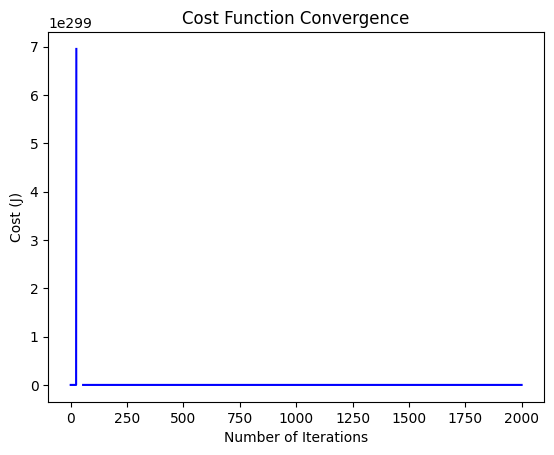

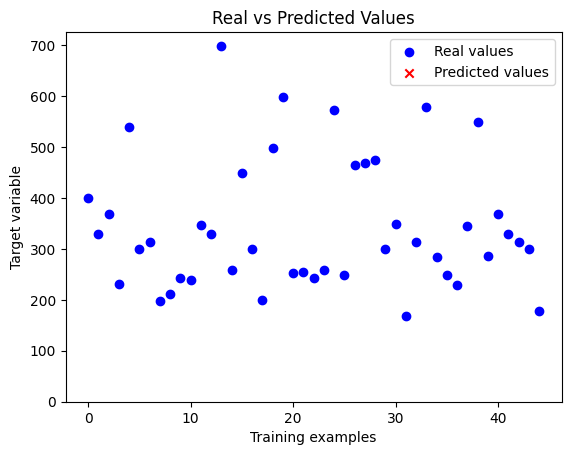

Prediction for new example: nan
Mean Absolute Error: nan


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plotCostHistory(cost_history): 
    """Построение графика функции потерь по итерациям."""
    plt.plot(cost_history, color='blue')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost (J)")
    plt.title("Cost Function Convergence")
    plt.show()

def plotPredictions(X, y, theta):
    """Построение графика для сравнения реальных и предсказанных значений, начиная от нуля по оси Y."""
    predictions = X.dot(theta)
    plt.scatter(range(len(y)), y, color='blue', label='Real values')
    plt.scatter(range(len(y)), predictions, color='red', label='Predicted values', marker='x')
    plt.xlabel("Training examples")
    plt.ylabel("Target variable")
    plt.title("Real vs Predicted Values")
    plt.ylim(bottom=0)  # Установка нижней границы Y в 0
    plt.legend()
    plt.show()

def computeCostMultiWithRegularization(X, y, theta, lambda_reg):
    m = len(y)
    predictions = X.dot(theta)
    sq_errors = (predictions - y) ** 2
    reg_term = lambda_reg * np.sum(np.square(theta[1:]))  # регуляризация только для параметров
    return (1 / (2 * m)) * (np.sum(sq_errors) + reg_term)

def computePredictionError(y, predictions):
    """Вычисление средней абсолютной ошибки предсказаний."""
    return np.mean(np.abs(predictions - y))

def gradientDescentMultiWithRegularization(X, y, theta, alpha, num_iters, lambda_reg):
    m = len(y)
    cost_history = []
    for i in range(num_iters):
        error = X.dot(theta) - y
        theta[0] -= (alpha / m) * np.sum(error)  # не регуляризируем theta[0]
        theta[1:] -= (alpha / m) * (X[:, 1:].T.dot(error) + lambda_reg * theta[1:])  # регуляризация
        cost_history.append(computeCostMultiWithRegularization(X, y, theta, lambda_reg))
    return theta, cost_history

# Основной код
data = pd.read_csv('data_multivar.txt', header=None).iloc[:45]
student_data = pd.read_csv('Student_Performance.csv')

X = data.iloc[:, :-1]  # Все колонки, кроме последней, как признаки
y = data.iloc[:, -1]  # Последняя колонка как целевая переменная
m = len(y)

# Нормализация признаков
#X = (X - X.mean()) / X.std()

# Добавляем столбец единиц для учета свободного члена theta0
X = np.hstack([np.ones((m, 1)), X])
theta = np.zeros(X.shape[1])

# Вычисление начальной стоимости
initial_cost = computeCostMultiWithRegularization(X, y, theta, 90)
print(f"Initial cost: {initial_cost}")

# Настройка параметров для градиентного спуска
iterations = 2000  # Увеличиваем до 2000
alpha = 0.1  # Например, устанавливаем его равным 0.1

# Запуск градиентного спуска
theta, cost_history = gradientDescentMulti(X, y, theta, alpha, iterations)
print(f"Theta: {theta}")

# Визуализация функции потерь
plotCostHistory(cost_history)

# Визуализация предсказаний и реальных значений
predictions = X.dot(theta)
plotPredictions(X, y, theta)

# Прогноз для новых данных (пример)
example = np.array([2104, 3])  # Пример новых данных (например, площадь и кол-во комнат)
example = (example - data.iloc[:, :-1].mean()) / data.iloc[:, :-1].std()  # Нормализация примера
example = np.hstack([1, example])  # Добавляем 1 для учета theta0
prediction = example.dot(theta)
print(f"Prediction for new example: {prediction}")
# Вычисление и вывод ошибки предсказания
error = computePredictionError(y, predictions)
print(f"Mean Absolute Error: {error}")

# Модифицированный код с использованием scikit-learn

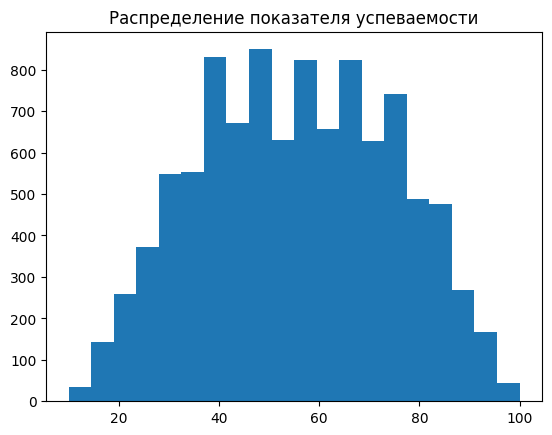

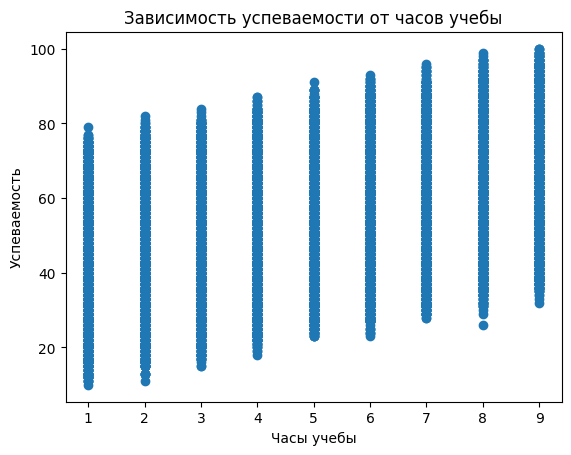

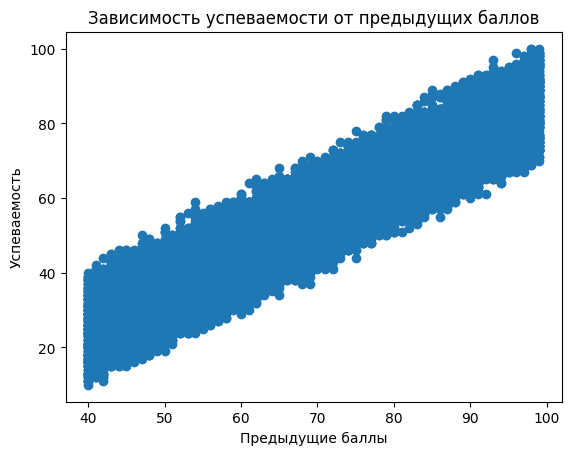

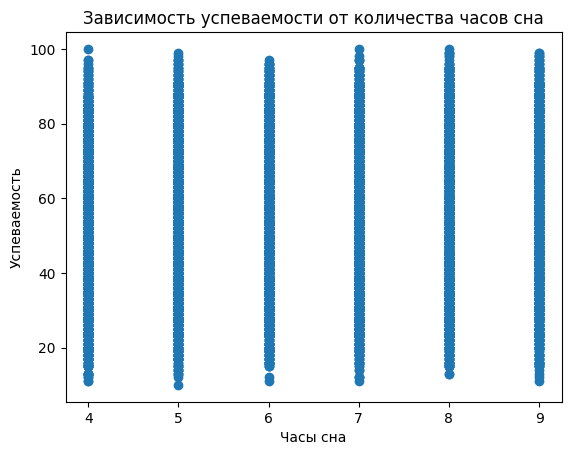

Mean Squared Error: 4.726380158439533
Mean Squared Error with Ridge: 4.7263699359382025


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

# Чтение файла
student_data = pd.read_csv('Student_Performance.csv')

# Построение графиков
plt.hist(student_data['Performance Index'], bins=20)
plt.title('Распределение показателя успеваемости')
plt.show()

plt.scatter(student_data['Hours Studied'], student_data['Performance Index'])
plt.title('Зависимость успеваемости от часов учебы')
plt.xlabel('Часы учебы')
plt.ylabel('Успеваемость')
plt.show()

plt.scatter(student_data['Previous Scores'], student_data['Performance Index'])
plt.title('Зависимость успеваемости от предыдущих баллов')
plt.xlabel('Предыдущие баллы')
plt.ylabel('Успеваемость')
plt.show()

plt.scatter(student_data['Sleep Hours'], student_data['Performance Index'])
plt.title('Зависимость успеваемости от количества часов сна')
plt.xlabel('Часы сна')
plt.ylabel('Успеваемость')
plt.show()

# Обучение модели
X = student_data[['Hours Studied', 'Previous Scores', 'Sleep Hours']]
y = student_data['Performance Index']

# Разделение на обучение и тест
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1)

# Модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозирование
predictions = model.predict(X_valid)
mse = mean_squared_error(y_valid, predictions)
print(f'Mean Squared Error: {mse}')

# Регуляризация с помощью Ridge
ridge_reg = Ridge(alpha=1.0)  # Пример значения alpha
ridge_reg.fit(X_train, y_train)
ridge_predictions = ridge_reg.predict(X_valid)

ridge_mse = mean_squared_error(y_valid, ridge_predictions)
print(f'Mean Squared Error with Ridge: {ridge_mse}')


Theta 0 (intercept): 339.78723404255317
Theta (slopes for each feature): [109.52635869  -6.62499229]


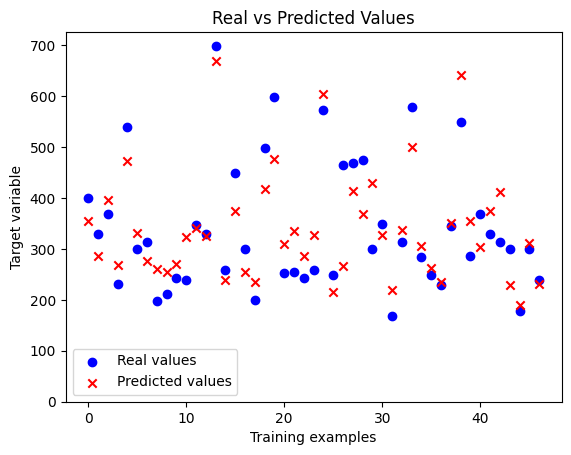

Prediction for new example: 292.43154102173486
Mean Absolute Error: 51.48390820793431


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error  # Импортируем функцию для вычисления MAE

def plotPredictions(y, y_pred):
    """Построение графика для сравнения реальных и предсказанных значений."""
    plt.scatter(range(len(y)), y, color='blue', label='Real values')
    plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted values', marker='x')
    plt.xlabel("Training examples")
    plt.ylabel("Target variable")
    plt.title("Real vs Predicted Values")
    plt.ylim(bottom=0)  # Начало от нуля по оси Y
    plt.legend()
    plt.show()

# Основной код
data = pd.read_csv('data_multivar.txt', header=None)  # Загрузите данные с несколькими признаками
X = data.iloc[:, :-1].values  # Все колонки, кроме последней, как признаки
y = data.iloc[:, -1].values  # Последняя колонка как целевая переменная

# Нормализация признаков
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Инициализация и обучение модели
model = LinearRegression()
model.fit(X, y)

# Параметры модели
theta_0 = model.intercept_
theta_1 = model.coef_
print(f"Theta 0 (intercept): {theta_0}")
print(f"Theta (slopes for each feature): {theta_1}")

# Прогнозируем значения y на основе модели
y_pred = model.predict(X)

# Визуализация предсказанных и реальных значений
plotPredictions(y, y_pred)

# Прогноз для новых данных
new_example = np.array([1650, 3])  # Пример новых данных (площадь и количество комнат)
new_example_scaled = scaler.transform([new_example])  # Нормализация нового примера
prediction = model.predict(new_example_scaled)
print(f"Prediction for new example: {prediction[0]}")
# Вычисление Mean Absolute Error
error = mean_absolute_error(y, y_pred)
print(f"Mean Absolute Error: {error}")

# Прогнозирование с помощью полиномиальной регрессии и регуляризации

Theta 0 (intercept): 352.8689435993661
Theta (slopes for each feature): [  0.         113.16319748 -12.73190992 -10.74522324  28.67226163
 -18.3920125 ]


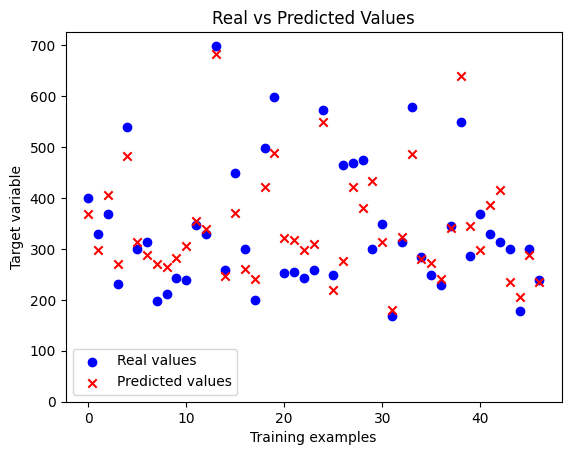

Prediction for new example: 305.0853381104383
Mean Absolute Error: 48.83585753484166


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge  # Импортируем Ridge для L2-регуляризации
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

def plotCostHistory(cost_history):
    """Построение графика функции потерь по итерациям."""
    plt.plot(cost_history, color='blue')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost (J)")
    plt.title("Cost Function Convergence")
    plt.show()

def plotPredictions(y, y_pred):
    """Построение графика для сравнения реальных и предсказанных значений."""
    plt.scatter(range(len(y)), y, color='blue', label='Real values')
    plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted values', marker='x')
    plt.xlabel("Training examples")
    plt.ylabel("Target variable")
    plt.title("Real vs Predicted Values")
    plt.ylim(bottom=0)  # Начало от нуля по оси Y
    plt.legend()
    plt.show()

def computePredictionError(y, y_pred):
    """Вычисление средней абсолютной ошибки предсказаний."""
    return np.mean(np.abs(y - y_pred))

# Основной код
data = pd.read_csv('data_multivar.txt', header=None)  # Загрузите данные с несколькими признаками
X = data.iloc[:, :-1].values  # Все колонки, кроме последней, как признаки
y = data.iloc[:, -1].values  # Последняя колонка как целевая переменная

# Нормализация признаков
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Генерация полиномиальных признаков (степени 2)
poly = PolynomialFeatures(degree=2)  # Вы можете изменить степень на нужную вам
X_poly = poly.fit_transform(X)

# Инициализация и обучение модели с регуляризацией
alpha = 1.0  # Параметр регуляризации
model = Ridge(alpha=alpha)  # Используем Ridge для L2-регуляризации
model.fit(X_poly, y)

# Параметры модели
theta_0 = model.intercept_
theta_1 = model.coef_
print(f"Theta 0 (intercept): {theta_0}")
print(f"Theta (slopes for each feature): {theta_1}")

# Прогнозируем значения y на основе модели
y_pred = model.predict(X_poly)

# Визуализация предсказанных и реальных значений
plotPredictions(y, y_pred)

# Прогноз для новых данных
new_example = np.array([1650, 3])  # Пример новых данных (площадь и количество комнат)
new_example_scaled = scaler.transform([new_example])  # Нормализация нового примера
new_example_poly = poly.transform(new_example_scaled)  # Преобразование в полиномиальные признаки
prediction = model.predict(new_example_poly)
print(f"Prediction for new example: {prediction[0]}")
# Вычисление и вывод ошибки предсказания
error = computePredictionError(y, y_pred)
print(f"Mean Absolute Error: {error}")

## Лабораторная работа
1. Ознакомьтесь с кодом выше, попробуйте изменить параметры:
- число данных;
- шаг обучения (learning rate - alpha);
- число итераций сходимости функции ошибки (cost function);
- рассмотрите вариант обучения модели без параметров нормализации StandardScaler и объясните результаты;
- измените параметры регуляризации и посмотрите, как это влияет на точность обучения. Вы можете варьировать значения alpha в диапазоне от 0.001 до 10000
- предложите алгоритм для выбора оптимальных параметров (регуляризации, шага обучения, числа итераций).

2. Примените модель регрессии на новых данных из файла Student_Performance.csv. Откройте и прочитайте файл Student_Performance.csv с помощью Pandas.
- Постройте графики: распределение показателя успеваемости; зависимость успеваемости от часов учебы; зависимость успеваемости от предыдущих баллов; зависимость успеваемости от количества часов сна студентов.
- Представьте результат обучения вашей модели регрессии с помощью библиотеки scikit-learn и объясните решение.
- Примените регуляризацию и сравните точность обучения с предыдущим пунктом. Вы можете варьировать значения alpha в широком диапазоне. 

3. *Вы можете предложить обработать любой файл, который, на ваш взгляд, было бы интересно обработать и получить результат предсказания некоторых данных. Достаточно много данных можно найти на сайте https://www.kaggle.com/.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Чтение CSV файла
data = pd.read_csv('Student_Performance.csv')
# Просмотр первых нескольких строк данных
data.head(3)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0


Hours Studied — Часы учебы
<p> 
Previous Scores — Предыдущие оценки
<p> 
Extracurricular Activities — Внеучебные мероприятия
<p> 
Sleep Hours — Часы сна
<p> 
Sample Question Papers Practiced — Практика с образцами контрольных работ
<p> 
Performance Index — Индекс успеваемости